In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

In [3]:
aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [4]:
dur = 500.
t_pen = 0.6

In [5]:
file_ = '3_E.pickle'
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = '3'

/adaptation_excursion


In [6]:
dur_pre = 10
dur_post = 100

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]
c_var = [0]
#wp = 1. / (dur * t_pen[1] - t_pen[0] * dur)
wp = 1. / (dur - t_pen*dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [7]:
bestControl_ = None

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]

file found


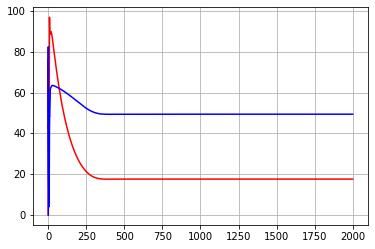

In [8]:
# get initial parameters and target states

aln.params.sigma_ou = 0.

aln.params.duration = 2000.

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

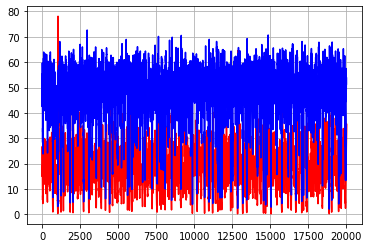

3.657202687387318
17.5592710822387


In [9]:
aln.params.sigma_ou = 0.1

aln.params.duration = 20000.

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

setinit(initVars, aln)

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

e_ = []
i_ = []
t_ind = []

for t in range(len(aln.t)):
    
    if aln.rates_exc[0,t] > 10:
        continue
    if aln.rates_inh[0,t] > 30:
        continue
    
    t_ind.append(t)
    e_.append(aln.rates_exc[0,t])
    i_.append(aln.rates_inh[0,t])
    
print(np.mean(e_))
print(np.mean(i_))

target = np.zeros((2))
target[0] = np.mean(e_)
target[1] = np.mean(i_)

set cost params:  0.005 0.0 0.0
interpolate adjoint :  True True True
initial cost =  96.85965707911005
RUN  0 , total integrated cost =  96.85965707911005
Gradient descend method:  None
RUN  0 , total integrated cost =  96.85965707911005
Improved over  0  iterations in  0.0  seconds by  0.0  percent.


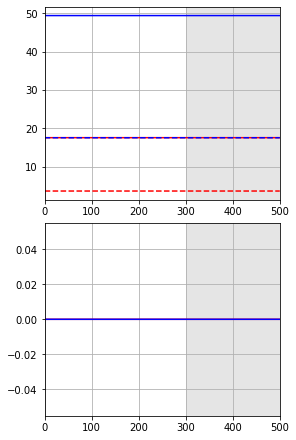

In [10]:
# get uncontrolled cost
    
aln.params.duration = dur
aln.params.sigma_ou = 0.

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

cost.setParams(wp, 0.0, 0.0)

aln.params.mue_ext_mean = p0[0] * 5.
aln.params.mui_ext_mean = p0[1] * 5.

setinit(initVars, aln)
control0 = aln.getZeroControl()

cgv = None
max_it = 0

bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_init_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_init_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_init_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_init_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

cost_uncontrolled = cost_init_[0]

set cost params:  0.005 0.0 10.0
interpolate adjoint :  True True True
initial cost =  96.85965707911005
RUN  0 , total integrated cost =  96.85965707911005
Gradient descend method:  None
RUN  1 , total integrated cost =  96.01089164475577
RUN  2 , total integrated cost =  95.75113841369925
RUN  3 , total integrated cost =  95.57809134859203
RUN  4 , total integrated cost =  93.37020781000884
RUN  5 , total integrated cost =  88.64967497761036
RUN  6 , total integrated cost =  85.33710237286326
RUN  7 , total integrated cost =  84.04562427971084
RUN  8 , total integrated cost =  82.26612330431294
RUN  9 , total integrated cost =  81.60192937552434


ERROR:root:Problem in initial value trasfer post


RUN  10 , total integrated cost =  80.5452469483391
RUN  10 , total integrated cost =  80.5452469483391
Improved over  10  iterations in  13.743762499012519  seconds by  16.84334905031325  percent.
Problem in initial value trasfer post:  Vmean_exc -57.1269783945184 -57.119060739949404


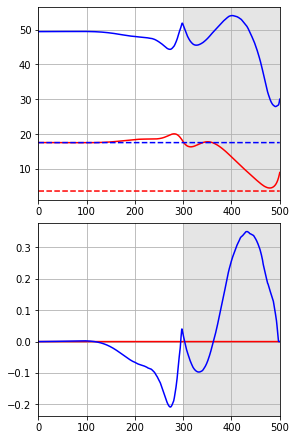

uncontrolled cost :  96.85965707911005
cost splitting :  9692.411181024096 [0.        3.2083191]


In [12]:
cgv = None
c_var = [1]
j = 0

aln.params.duration = dur
setinit(initVars, aln)

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

control0 = aln.getZeroControl()
cost.setParams(wp, 0., 10.)
max_it = int(10)

#control0[0,0,2400:2500] = 0.5

bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

print('uncontrolled cost : ', cost_uncontrolled)
print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])    

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  51.67037500944243
RUN  0 , total integrated cost =  51.67037500944243
Gradient descend method:  None
RUN  1 , total integrated cost =  50.44866615397528
RUN  2 , total integrated cost =  48.734572423937024
RUN  3 , total integrated cost =  47.74374748761939
RUN  4 , total integrated cost =  46.487089625994145
RUN  5 , total integrated cost =  45.6644377290744
RUN  6 , total integrated cost =  44.70297537444125
RUN  7 , total integrated cost =  44.11287461166271
RUN  8 , total integrated cost =  43.295655590234965
RUN  9 , total integrated cost =  42.781973345638136
RUN  10 , total integrated cost =  41.88326781036638
RUN  11 , total integrated cost =  41.36909506645564
RUN  12 , total integrated cost =  31.03559449802539
RUN  13 , total integrated cost =  30.968092629194015
RUN  14 , total integrated cost =  30.895401808689755
RUN  15 , total integrated cost =  30.824053213725907
RUN  16 , total integ

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  23.13549290982034
RUN  300 , total integrated cost =  23.13549290982034
Improved over  300  iterations in  49.5067097999854  seconds by  55.224840335313075  percent.
Problem in initial value trasfer post:  Vmean_exc -56.728767659079736 -56.72379005238808
cost splitting :  3859.719543752654 [0.42219046 3.41470473]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  23.13549290982034
RUN  0 , total integrated cost =  23.13549290982034
Gradient descend method:  None
RUN  1 , total integrated cost =  23.10521826333925
RUN  2 , total integrated cost =  23.08175930724165
RUN  3 , total integrated cost =  23.052152856114198
RUN  4 , total integrated cost =  23.028146021491512
RUN  5 , total integrated cost =  23.000530854690627
RUN  6 , total integrated cost =  22.979435940143212
RUN  7 , total integrated cost =  22.953502931863657
RUN  8 , total integrated cost =  22.935648855681276
RUN  9 , total integrated cost =  22.912

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  7.79684982203068
RUN  300 , total integrated cost =  7.79684982203068
Improved over  300  iterations in  49.869577093981206  seconds by  66.2991843207233  percent.
Problem in initial value trasfer post:  Vmean_exc -57.22890221081774 -57.210907952304844
cost splitting :  467.3710601386824 [0.440021   5.01997352]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  7.79684982203068
RUN  0 , total integrated cost =  7.79684982203068
Gradient descend method:  None
RUN  1 , total integrated cost =  7.796707805197868
RUN  2 , total integrated cost =  7.796545686461231
RUN  3 , total integrated cost =  7.796403677677096
RUN  4 , total integrated cost =  7.7962416198983675
RUN  5 , total integrated cost =  7.796099617830233
RUN  6 , total integrated cost =  7.795937610692922
RUN  7 , total integrated cost =  7.795795626542379
RUN  8 , total integrated cost =  7.795633676731308
RUN  9 , total integrated cost =  7.7954917055252

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  7.752122902724842
RUN  300 , total integrated cost =  7.752122902724842
Improved over  300  iterations in  38.73547996702837  seconds by  0.5736537233211578  percent.
Problem in initial value trasfer post:  Vmean_exc -57.22887784216445 -57.210874528901215
cost splitting :  457.87603390597315 [0.44097132 5.02177141]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  7.752122902724842
RUN  0 , total integrated cost =  7.752122902724842
Gradient descend method:  None
RUN  1 , total integrated cost =  7.75198696495507
RUN  2 , total integrated cost =  7.7518307099770745
RUN  3 , total integrated cost =  7.751694905180717
RUN  4 , total integrated cost =  7.751538728214344
RUN  5 , total integrated cost =  7.751402961938222
RUN  6 , total integrated cost =  7.751246851969306
RUN  7 , total integrated cost =  7.751111103585534
RUN  8 , total integrated cost =  7.750955045688741
RUN  9 , total integrated cost =  7.75081932

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  7.190002352412609
RUN  300 , total integrated cost =  7.190002352412609
Improved over  300  iterations in  34.75756199401803  seconds by  7.25118212605544  percent.
Problem in initial value trasfer post:  Vmean_exc -57.42821249418583 -57.40803134241888
cost splitting :  333.88846180509756 [0.4875834  5.03297665]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  7.190002352412609
RUN  0 , total integrated cost =  7.190002352412609
Gradient descend method:  None
RUN  1 , total integrated cost =  7.078637962440812
RUN  2 , total integrated cost =  7.07723435396424
RUN  3 , total integrated cost =  7.076508400857816
RUN  4 , total integrated cost =  7.075615005731592
RUN  5 , total integrated cost =  7.075579706713109
RUN  6 , total integrated cost =  7.0755333217818865
RUN  7 , total integrated cost =  7.075492595696973
RUN  8 , total integrated cost =  7.075447731498762
RUN  9 , total integrated cost =  7.07541015312

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.806419564980419
RUN  300 , total integrated cost =  6.806419564980419
Improved over  300  iterations in  37.61232092999853  seconds by  5.334946619363464  percent.
Problem in initial value trasfer post:  Vmean_exc -57.3096007825545 -57.29027524617767
cost splitting :  250.23420396505173 [0.49914338 5.05610516]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.806419564980419
RUN  0 , total integrated cost =  6.806419564980419
Gradient descend method:  None
RUN  1 , total integrated cost =  6.806329747564789
RUN  2 , total integrated cost =  6.8062466993661825
RUN  3 , total integrated cost =  6.806153859240129
RUN  4 , total integrated cost =  6.806061638366004
RUN  5 , total integrated cost =  6.805969367363613
RUN  6 , total integrated cost =  6.8058766731821985
RUN  7 , total integrated cost =  6.805780469667973
RUN  8 , total integrated cost =  6.805691848753474
RUN  9 , total integrated cost =  6.805592817

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.388454502184274
RUN  300 , total integrated cost =  6.388454502184274
Improved over  300  iterations in  37.07560176902916  seconds by  6.140747845557584  percent.
Problem in initial value trasfer post:  Vmean_exc -57.39349428063949 -57.373648453338525
cost splitting :  149.48040690761832 [0.53872689 5.10232558]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.388454502184274
RUN  0 , total integrated cost =  6.388454502184274
Gradient descend method:  None
RUN  1 , total integrated cost =  6.388435624111902
RUN  2 , total integrated cost =  6.388405204825794
RUN  3 , total integrated cost =  6.388378883658945
RUN  4 , total integrated cost =  6.386588516472431
RUN  5 , total integrated cost =  6.38636539689288
RUN  6 , total integrated cost =  6.386157102763586
RUN  7 , total integrated cost =  6.385955002921768
RUN  8 , total integrated cost =  6.38244228644841
RUN  9 , total integrated cost =  6.38069657583

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.277487676826966
RUN  300 , total integrated cost =  6.277487676826966
Improved over  300  iterations in  40.418740481021814  seconds by  1.7369901487029153  percent.
Problem in initial value trasfer post:  Vmean_exc -57.37432650556005 -57.35480620703227
cost splitting :  136.1147410279655 [0.54075755 5.05615642]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.277487676826966
RUN  0 , total integrated cost =  6.277487676826966
Gradient descend method:  None
RUN  1 , total integrated cost =  6.2774414405424315
RUN  2 , total integrated cost =  6.277276696625336
RUN  3 , total integrated cost =  6.277107450158161
RUN  4 , total integrated cost =  6.276967891888335
RUN  5 , total integrated cost =  6.27681712236946
RUN  6 , total integrated cost =  6.2766865444832645
RUN  7 , total integrated cost =  6.276557689276929
RUN  8 , total integrated cost =  6.276407925022819
RUN  9 , total integrated cost =  6.27626865

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.151980605434776
RUN  300 , total integrated cost =  6.151980605434776
Improved over  300  iterations in  36.84257745096693  seconds by  1.9993200760153371  percent.
Problem in initial value trasfer post:  Vmean_exc -57.399591370381586 -57.380313085202935
cost splitting :  113.28935786834863 [0.56604801 5.01948581]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.151980605434776
RUN  0 , total integrated cost =  6.151980605434776
Gradient descend method:  None
RUN  1 , total integrated cost =  6.151863367286061
RUN  2 , total integrated cost =  6.151785691500694
RUN  3 , total integrated cost =  6.151702911538539
RUN  4 , total integrated cost =  6.151642426242325
RUN  5 , total integrated cost =  6.151576065309937
RUN  6 , total integrated cost =  6.151530241524481
RUN  7 , total integrated cost =  6.151478805309255
RUN  8 , total integrated cost =  6.1514377107975555
RUN  9 , total integrated cost =  6.151390

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.102758685087993
RUN  300 , total integrated cost =  6.102758685087993
Improved over  300  iterations in  36.98009086801903  seconds by  0.8000987568670013  percent.
Problem in initial value trasfer post:  Vmean_exc -57.41891251230958 -57.4000453348426
cost splitting :  108.32225750139617 [0.57317018 4.98797721]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.102758685087993
RUN  0 , total integrated cost =  6.102758685087993
Gradient descend method:  None
RUN  1 , total integrated cost =  6.102702010556218
RUN  2 , total integrated cost =  6.102646711524594
RUN  3 , total integrated cost =  6.1025890209688765
RUN  4 , total integrated cost =  6.102536322738947
RUN  5 , total integrated cost =  6.102476297205749
RUN  6 , total integrated cost =  6.102426295083101
RUN  7 , total integrated cost =  6.102373171233161
RUN  8 , total integrated cost =  6.1023170378692155
RUN  9 , total integrated cost =  6.10225174

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  6.025436384914811
RUN  300 , total integrated cost =  6.025436384914811
Improved over  300  iterations in  37.000413481961004  seconds by  1.2670056963274305  percent.
Problem in initial value trasfer post:  Vmean_exc -57.40182417828744 -57.38282762994247
cost splitting :  103.48050937508144 [0.59127222 4.91676162]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.025436384914811
RUN  0 , total integrated cost =  6.025436384914811
Gradient descend method:  None
RUN  1 , total integrated cost =  6.0253991443371175
RUN  2 , total integrated cost =  6.025312449008406
RUN  3 , total integrated cost =  6.025213814896958
RUN  4 , total integrated cost =  6.025133300829368
RUN  5 , total integrated cost =  6.02503931698716
RUN  6 , total integrated cost =  6.024964246197739
RUN  7 , total integrated cost =  6.024885323039874
RUN  8 , total integrated cost =  6.02481492853225
RUN  9 , total integrated cost =  6.024734951

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer post


Control only changes marginally.
RUN  261 , total integrated cost =  6.005448521098123
Improved over  261  iterations in  32.84888460097136  seconds by  0.33172475053805783  percent.
Problem in initial value trasfer post:  Vmean_exc -57.40947481841643 -57.390527991941426
cost splitting :  99.63802166635885 [0.59671514 4.91054327]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.005448521098123
RUN  0 , total integrated cost =  6.005448521098123
Gradient descend method:  None
RUN  1 , total integrated cost =  6.005448521098123
Control only changes marginally.
RUN  1 , total integrated cost =  6.005448521098123
Improved over  1  iterations in  0.15502093400573358  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.40947481841643 -57.390527991941426
cost splitting :  99.63802166635885 [0.59671514 4.91054327]


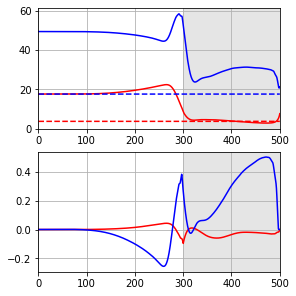

In [13]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-6
    
while not conv:

    weight_ = 1.

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[2] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        for k in range(2):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  6.005448521098123
RUN  0 , total integrated cost =  6.005448521098123
Gradient descend method:  None
RUN  1 , total integrated cost =  6.005430318591816
RUN  2 , total integrated cost =  6.005408979311943
RUN  3 , total integrated cost =  6.005394859053889
RUN  4 , total integrated cost =  6.005375907957211
RUN  5 , total integrated cost =  6.005361936876257
RUN  6 , total integrated cost =  6.00534051593062
RUN  7 , total integrated cost =  6.005325309640549
RUN  8 , total integrated cost =  6.005100369089941
RUN  9 , total integrated cost =  6.004901270632703
RUN  10 , total integrated cost =  6.004806085761818
RUN  11 , total integrated cost =  6.004697699809545
RUN  12 , total integrated cost =  6.00434826716539
RUN  13 , total integrated cost =  6.004257757020355
RUN  14 , total integrated cost =  6.004224526697312
RUN  15 , total integrated cost =  6.004185051266323
RUN  16 , total integrated co

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.9723687922478765
RUN  300 , total integrated cost =  5.9723687922478765
Improved over  300  iterations in  53.098038468975574  seconds by  0.5508286139500171  percent.
Problem in initial value trasfer post:  Vmean_exc -57.39938004076221 -57.38036315731213
cost splitting :  99.57726195306228 [0.6037665  4.87071598]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.9723687922478765
RUN  0 , total integrated cost =  5.9723687922478765
Gradient descend method:  None
RUN  1 , total integrated cost =  5.97230531347065
RUN  2 , total integrated cost =  5.9722462445768425
RUN  3 , total integrated cost =  5.97218094558059
RUN  4 , total integrated cost =  5.972121876506474
RUN  5 , total integrated cost =  5.972056735362404
RUN  6 , total integrated cost =  5.971998571871044
RUN  7 , total integrated cost =  5.971932604478746
RUN  8 , total integrated cost =  5.971875040747919
RUN  9 , total integrated cost =  5.971808

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.953625128434631
RUN  300 , total integrated cost =  5.953625128434631
Improved over  300  iterations in  74.43245681497501  seconds by  0.3138396918417925  percent.
Problem in initial value trasfer post:  Vmean_exc -57.39406642957485 -57.37498529400334
cost splitting :  95.38449755970444 [0.60959535 4.86710729]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.953625128434631
RUN  0 , total integrated cost =  5.953625128434631
Gradient descend method:  None
RUN  1 , total integrated cost =  5.953480180382345
RUN  2 , total integrated cost =  5.9534579218570265
RUN  3 , total integrated cost =  5.953436847182234
RUN  4 , total integrated cost =  5.953365323237107
RUN  5 , total integrated cost =  5.953286074656905
RUN  6 , total integrated cost =  5.953215611712953
RUN  7 , total integrated cost =  5.953151087085854
RUN  8 , total integrated cost =  5.953104046919136
RUN  9 , total integrated cost =  5.953059157

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.927084462135646
RUN  300 , total integrated cost =  5.927084462135646
Improved over  300  iterations in  44.56511754402891  seconds by  0.44579001409117325  percent.
Problem in initial value trasfer post:  Vmean_exc -57.40464783631506 -57.385574101480124
cost splitting :  92.85746487200862 [0.61700965 4.84578749]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.927084462135646
RUN  0 , total integrated cost =  5.927084462135646
Gradient descend method:  None
RUN  1 , total integrated cost =  5.927010869008455
RUN  2 , total integrated cost =  5.926947441840705
RUN  3 , total integrated cost =  5.926880558148815
RUN  4 , total integrated cost =  5.926809343448141
RUN  5 , total integrated cost =  5.926748787918984
RUN  6 , total integrated cost =  5.926688286943995
RUN  7 , total integrated cost =  5.926617076894785
RUN  8 , total integrated cost =  5.926548317070644
RUN  9 , total integrated cost =  5.92648810

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.878127200794123
RUN  300 , total integrated cost =  5.878127200794123
Improved over  300  iterations in  42.86189059203025  seconds by  0.8259923011774077  percent.
Problem in initial value trasfer post:  Vmean_exc -57.401022545130196 -57.381989267946
cost splitting :  91.38197781073902 [0.63200246 4.78921485]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.878127200794123
RUN  0 , total integrated cost =  5.878127200794123
Gradient descend method:  None
RUN  1 , total integrated cost =  5.878067623860985
RUN  2 , total integrated cost =  5.8780049898622515
RUN  3 , total integrated cost =  5.877947906784833
RUN  4 , total integrated cost =  5.877883261488187
RUN  5 , total integrated cost =  5.877819017892574
RUN  6 , total integrated cost =  5.87776512639982
RUN  7 , total integrated cost =  5.8777113604867095
RUN  8 , total integrated cost =  5.87763153855758
RUN  9 , total integrated cost =  5.87756450540

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.853834345333475
RUN  300 , total integrated cost =  5.853834345333475
Improved over  300  iterations in  47.12645408598473  seconds by  0.41327542992547706  percent.
Problem in initial value trasfer post:  Vmean_exc -57.3986699063509 -57.379603129182286
cost splitting :  89.41856218746977 [0.63990556 4.76683597]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.853834345333475
RUN  0 , total integrated cost =  5.853834345333475
Gradient descend method:  None
RUN  1 , total integrated cost =  5.853740465213254
RUN  2 , total integrated cost =  5.853689629547592
RUN  3 , total integrated cost =  5.853637875372949
RUN  4 , total integrated cost =  5.853562204347315
RUN  5 , total integrated cost =  5.85348686679936
RUN  6 , total integrated cost =  5.853439866286495
RUN  7 , total integrated cost =  5.853393064839045
RUN  8 , total integrated cost =  5.853344724499822
RUN  9 , total integrated cost =  5.8533008460

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.747932484189503
RUN  300 , total integrated cost =  5.747932484189503
Improved over  300  iterations in  46.10259067598963  seconds by  1.8091024599695658  percent.
Problem in initial value trasfer post:  Vmean_exc -57.45023771155703 -57.429906802306085
cost splitting :  74.96405588508141 [0.69035575 4.68275646]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.747932484189503
RUN  0 , total integrated cost =  5.747932484189503
Gradient descend method:  None
RUN  1 , total integrated cost =  5.7478773084278
RUN  2 , total integrated cost =  5.747827128465947
RUN  3 , total integrated cost =  5.747770962268542
RUN  4 , total integrated cost =  5.747720780171482
RUN  5 , total integrated cost =  5.7476327284766695
RUN  6 , total integrated cost =  5.747549325983384
RUN  7 , total integrated cost =  5.7475165057884405
RUN  8 , total integrated cost =  5.747473627203662
RUN  9 , total integrated cost =  5.747467731

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.553955417782683
RUN  300 , total integrated cost =  5.553955417782683
Improved over  300  iterations in  38.921772869012784  seconds by  3.374727642337149  percent.
Problem in initial value trasfer post:  Vmean_exc -57.52653160136183 -57.50624563792361
cost splitting :  48.292722007123814 [0.81491615 4.49757566]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.553955417782683
RUN  0 , total integrated cost =  5.553955417782683
Gradient descend method:  None
RUN  1 , total integrated cost =  5.553943413983715
RUN  2 , total integrated cost =  5.553928663215158
RUN  3 , total integrated cost =  5.553917232830672
RUN  4 , total integrated cost =  5.553903499468793
RUN  5 , total integrated cost =  5.553891909735822
RUN  6 , total integrated cost =  5.553878452845237
RUN  7 , total integrated cost =  5.553866836785254
RUN  8 , total integrated cost =  5.553853507928957
RUN  9 , total integrated cost =  5.553841905

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.464654458285458
RUN  300 , total integrated cost =  5.464654458285458
Improved over  300  iterations in  38.345234789012466  seconds by  1.607880380373615  percent.
Problem in initial value trasfer post:  Vmean_exc -57.50383782947979 -57.48312719843494
cost splitting :  55.71801159631744 [0.8543351 4.3317293]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.464654458285458
RUN  0 , total integrated cost =  5.464654458285458
Gradient descend method:  None
RUN  1 , total integrated cost =  5.46458326913845
RUN  2 , total integrated cost =  5.464577527899406
RUN  3 , total integrated cost =  5.464564464251273
RUN  4 , total integrated cost =  5.464561383592293
RUN  5 , total integrated cost =  5.46453477330614
RUN  6 , total integrated cost =  5.464509844864297
RUN  7 , total integrated cost =  5.464507167121644
RUN  8 , total integrated cost =  5.464493339005899
RUN  9 , total integrated cost =  5.46448239866604

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.363981473754756
RUN  300 , total integrated cost =  5.363981473754756
Improved over  300  iterations in  45.50391943595605  seconds by  1.8422570960193525  percent.
Problem in initial value trasfer post:  Vmean_exc -57.48499832570176 -57.46396409586354
cost splitting :  52.20589305377309 [0.92182177 4.18113024]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.363981473754756
RUN  0 , total integrated cost =  5.363981473754756
Gradient descend method:  None
RUN  1 , total integrated cost =  5.363973992551944
RUN  2 , total integrated cost =  5.363963458246702
RUN  3 , total integrated cost =  5.363954705077945
RUN  4 , total integrated cost =  5.3639427779959785
RUN  5 , total integrated cost =  5.363932995446353
RUN  6 , total integrated cost =  5.363916592916566
RUN  7 , total integrated cost =  5.36390152066912
RUN  8 , total integrated cost =  5.363885950197815
RUN  9 , total integrated cost =  5.3638704802

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.2253942878304835
RUN  300 , total integrated cost =  5.2253942878304835
Improved over  300  iterations in  35.998263862973545  seconds by  2.5836626506329594  percent.
Problem in initial value trasfer post:  Vmean_exc -57.45424650172809 -57.43282393570868
cost splitting :  56.44841248043465 [1.02168352 3.92146871]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.2253942878304835
RUN  0 , total integrated cost =  5.2253942878304835
Gradient descend method:  None
RUN  1 , total integrated cost =  5.225254653106622
RUN  2 , total integrated cost =  5.225135323799513
RUN  3 , total integrated cost =  5.22501539115544
RUN  4 , total integrated cost =  5.224903863652318
RUN  5 , total integrated cost =  5.224711664572527
RUN  6 , total integrated cost =  5.224569238708641
RUN  7 , total integrated cost =  5.224372318310704
RUN  8 , total integrated cost =  5.224210119324301
RUN  9 , total integrated cost =  5.224035

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  5.018910906739604
RUN  300 , total integrated cost =  5.018910906739604
Improved over  300  iterations in  35.01559310400626  seconds by  3.9515368547740337  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55740592912087 -57.53717436664509
cost splitting :  35.544421987108514 [1.21235998 3.62882882]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  5.018910906739604
RUN  0 , total integrated cost =  5.018910906739604
Gradient descend method:  None
RUN  1 , total integrated cost =  5.018818754521242
RUN  2 , total integrated cost =  5.018758476060684
RUN  3 , total integrated cost =  5.01863075172081
RUN  4 , total integrated cost =  5.0185412537763225
RUN  5 , total integrated cost =  5.0159635238709415
RUN  6 , total integrated cost =  5.013887101022371
RUN  7 , total integrated cost =  5.012903516512456
RUN  8 , total integrated cost =  5.012616060326216
RUN  9 , total integrated cost =  5.01243360

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.9433311811534395
RUN  300 , total integrated cost =  4.9433311811534395
Improved over  300  iterations in  38.9717216870049  seconds by  1.5058989288826155  percent.
Problem in initial value trasfer post:  Vmean_exc -57.60399360666628 -57.58133625066198
cost splitting :  28.950414303572995 [1.29400341 3.5045757 ]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.9433311811534395
RUN  0 , total integrated cost =  4.9433311811534395
Gradient descend method:  None
RUN  1 , total integrated cost =  4.943178056043253
RUN  2 , total integrated cost =  4.943053022940552
RUN  3 , total integrated cost =  4.942913624986313
RUN  4 , total integrated cost =  4.942791088661058
RUN  5 , total integrated cost =  4.942658917641217
RUN  6 , total integrated cost =  4.942539018466813
RUN  7 , total integrated cost =  4.942416532290195
RUN  8 , total integrated cost =  4.942319546941211
RUN  9 , total integrated cost =  4.942215

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.893790715179886
RUN  300 , total integrated cost =  4.893790715179886
Improved over  300  iterations in  40.38929668802302  seconds by  1.0021676508834219  percent.
Problem in initial value trasfer post:  Vmean_exc -57.581182105848825 -57.559227863106585
cost splitting :  29.557635833497542 [1.33303297 3.41296957]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.893790715179886
RUN  0 , total integrated cost =  4.893790715179886
Gradient descend method:  None
RUN  1 , total integrated cost =  4.893492898416263
RUN  2 , total integrated cost =  4.893305849191679
RUN  3 , total integrated cost =  4.892614119876714
RUN  4 , total integrated cost =  4.892376546216304
RUN  5 , total integrated cost =  4.892206903904889
RUN  6 , total integrated cost =  4.8920955887728494
RUN  7 , total integrated cost =  4.891968280694454
RUN  8 , total integrated cost =  4.89186001682591
RUN  9 , total integrated cost =  4.8917362

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.828714736406525
RUN  300 , total integrated cost =  4.828714736406525
Improved over  300  iterations in  40.312263032014016  seconds by  1.3297662805952086  percent.
Problem in initial value trasfer post:  Vmean_exc -57.595753034165085 -57.57282933009561
cost splitting :  27.683137614347796 [1.39686869 3.29343035]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.828714736406525
RUN  0 , total integrated cost =  4.828714736406525
Gradient descend method:  None
RUN  1 , total integrated cost =  4.828546822379787
RUN  2 , total integrated cost =  4.828386686318279
RUN  3 , total integrated cost =  4.82819419935722
RUN  4 , total integrated cost =  4.8280228126266405
RUN  5 , total integrated cost =  4.827845285367073
RUN  6 , total integrated cost =  4.827682836390279
RUN  7 , total integrated cost =  4.827498007038957
RUN  8 , total integrated cost =  4.827325987916627
RUN  9 , total integrated cost =  4.8271523

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.755112042453316
RUN  300 , total integrated cost =  4.755112042453316
Improved over  300  iterations in  47.33780799602391  seconds by  1.5242709079141576  percent.
Problem in initial value trasfer post:  Vmean_exc -57.58026550042972 -57.558199835629225
cost splitting :  29.429116206350546 [1.45550043 3.15246603]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.755112042453316
RUN  0 , total integrated cost =  4.755112042453316
Gradient descend method:  None
RUN  1 , total integrated cost =  4.7549267043963965
RUN  2 , total integrated cost =  4.754770076259112
RUN  3 , total integrated cost =  4.754408867523734
RUN  4 , total integrated cost =  4.754166303890932
RUN  5 , total integrated cost =  4.754002533779189
RUN  6 , total integrated cost =  4.753867285600791
RUN  7 , total integrated cost =  4.753712875931322
RUN  8 , total integrated cost =  4.753584988784913
RUN  9 , total integrated cost =  4.7534344

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.686091499959433
RUN  300 , total integrated cost =  4.686091499959433
Improved over  300  iterations in  55.435681561008096  seconds by  1.4515019178869437  percent.
Problem in initial value trasfer post:  Vmean_exc -57.58369731029209 -57.561209440249016
cost splitting :  28.532300989558426 [1.52405037 3.01937963]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.686091499959433
RUN  0 , total integrated cost =  4.686091499959433
Gradient descend method:  None
RUN  1 , total integrated cost =  4.685537967488575
RUN  2 , total integrated cost =  4.685103915998345
RUN  3 , total integrated cost =  4.684879774890919
RUN  4 , total integrated cost =  4.684699600868733
RUN  5 , total integrated cost =  4.6844663976711916
RUN  6 , total integrated cost =  4.684256071221834
RUN  7 , total integrated cost =  4.683503074506887
RUN  8 , total integrated cost =  4.682855394182195
RUN  9 , total integrated cost =  4.682637

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.597050278231727
RUN  300 , total integrated cost =  4.597050278231727
Improved over  300  iterations in  87.43751679500565  seconds by  1.9001170107002139  percent.
Problem in initial value trasfer post:  Vmean_exc -57.57203040848574 -57.550592035658624
cost splitting :  29.094995610542348 [1.61173   2.8398453]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.597050278231727
RUN  0 , total integrated cost =  4.597050278231727
Gradient descend method:  None
RUN  1 , total integrated cost =  4.596737895530652
RUN  2 , total integrated cost =  4.596394222500833
RUN  3 , total integrated cost =  4.596081065363125
RUN  4 , total integrated cost =  4.595755026814807
RUN  5 , total integrated cost =  4.595442376693933
RUN  6 , total integrated cost =  4.5951014841854345
RUN  7 , total integrated cost =  4.594822677621651
RUN  8 , total integrated cost =  4.594524648493002
RUN  9 , total integrated cost =  4.594281326

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.502014399497311
RUN  300 , total integrated cost =  4.502014399497311
Improved over  300  iterations in  47.9747489609872  seconds by  2.067323021991669  percent.
Problem in initial value trasfer post:  Vmean_exc -57.53848576262909 -57.51725257353785
cost splitting :  33.2431257225467 [1.69690209 2.63889668]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.502014399497311
RUN  0 , total integrated cost =  4.502014399497311
Gradient descend method:  None
RUN  1 , total integrated cost =  4.501852145270655
RUN  2 , total integrated cost =  4.501635875228878
RUN  3 , total integrated cost =  4.5014451039279475
RUN  4 , total integrated cost =  4.501218038906729
RUN  5 , total integrated cost =  4.501004119025232
RUN  6 , total integrated cost =  4.500221395999933
RUN  7 , total integrated cost =  4.499720133906051
RUN  8 , total integrated cost =  4.499429144312237
RUN  9 , total integrated cost =  4.499234947387

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.445332264220015
RUN  300 , total integrated cost =  4.445332264220015
Improved over  300  iterations in  39.38420309196226  seconds by  1.2590394043080977  percent.
Problem in initial value trasfer post:  Vmean_exc -57.520849347246 -57.49926959806848
cost splitting :  34.55669150503218 [1.74696042 2.52558839]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.445332264220015
RUN  0 , total integrated cost =  4.445332264220015
Gradient descend method:  None
RUN  1 , total integrated cost =  4.445016856504886
RUN  2 , total integrated cost =  4.444784571733607
RUN  3 , total integrated cost =  4.44460247196262
RUN  4 , total integrated cost =  4.4443964150854764
RUN  5 , total integrated cost =  4.4441965603219415
RUN  6 , total integrated cost =  4.443993288222138
RUN  7 , total integrated cost =  4.443818252120317
RUN  8 , total integrated cost =  4.443617231705432
RUN  9 , total integrated cost =  4.44341971922

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.3802586927470095
RUN  300 , total integrated cost =  4.3802586927470095
Improved over  300  iterations in  39.030198619002476  seconds by  1.4638629376880488  percent.
Problem in initial value trasfer post:  Vmean_exc -57.51896311718022 -57.497195025643464
cost splitting :  36.858404054293544 [1.80793824 2.38802843]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.3802586927470095
RUN  0 , total integrated cost =  4.3802586927470095
Gradient descend method:  None
RUN  1 , total integrated cost =  4.380083853380294
RUN  2 , total integrated cost =  4.379888213645838
RUN  3 , total integrated cost =  4.379714872906479
RUN  4 , total integrated cost =  4.379509138411504
RUN  5 , total integrated cost =  4.379328850466948
RUN  6 , total integrated cost =  4.379124912964604
RUN  7 , total integrated cost =  4.378944755685437
RUN  8 , total integrated cost =  4.378738317491096
RUN  9 , total integrated cost =  4.378

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.2790129858314145
RUN  300 , total integrated cost =  4.2790129858314145
Improved over  300  iterations in  39.76990126102464  seconds by  2.311409302908089  percent.
Problem in initial value trasfer post:  Vmean_exc -57.52079694241805 -57.4987937749093
cost splitting :  37.72338922174155 [1.92126145 2.16913459]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.2790129858314145
RUN  0 , total integrated cost =  4.2790129858314145
Gradient descend method:  None
RUN  1 , total integrated cost =  4.278759623459062
RUN  2 , total integrated cost =  4.278417717541134
RUN  3 , total integrated cost =  4.278134353143743
RUN  4 , total integrated cost =  4.277827832107253
RUN  5 , total integrated cost =  4.277549074418905
RUN  6 , total integrated cost =  4.277267471624665
RUN  7 , total integrated cost =  4.277025635394897
RUN  8 , total integrated cost =  4.2766972841557065
RUN  9 , total integrated cost =  4.2763847

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  4.072675035295842
RUN  300 , total integrated cost =  4.072675035295842
Improved over  300  iterations in  45.4019743539975  seconds by  4.822092179172969  percent.
Problem in initial value trasfer post:  Vmean_exc -57.581885376558816 -57.55904276318315
cost splitting :  36.625237866830524 [2.18493314 1.7046157 ]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  4.072675035295842
RUN  0 , total integrated cost =  4.072675035295842
Gradient descend method:  None
RUN  1 , total integrated cost =  4.070903380980016
RUN  2 , total integrated cost =  4.0703648002324115
RUN  3 , total integrated cost =  4.069986234438613
RUN  4 , total integrated cost =  4.069540818737859
RUN  5 , total integrated cost =  4.069131942085542
RUN  6 , total integrated cost =  4.0687170188809345
RUN  7 , total integrated cost =  4.068261036596257
RUN  8 , total integrated cost =  4.067684678641884
RUN  9 , total integrated cost =  4.06695700

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.754192975790513
RUN  300 , total integrated cost =  3.754192975790513
Improved over  300  iterations in  46.1326864399598  seconds by  7.819972296959705  percent.
Problem in initial value trasfer post:  Vmean_exc -57.548532297024444 -57.525082491173066
cost splitting :  43.85534621525836 [2.63120348 0.90371277]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.754192975790513
RUN  0 , total integrated cost =  3.754192975790513
Gradient descend method:  None
RUN  1 , total integrated cost =  3.7535201111418623
RUN  2 , total integrated cost =  3.7528380027192627
RUN  3 , total integrated cost =  3.752119138326622
RUN  4 , total integrated cost =  3.7512960213688182
RUN  5 , total integrated cost =  3.750464204409985
RUN  6 , total integrated cost =  3.7495053618058964
RUN  7 , total integrated cost =  3.748500935316117
RUN  8 , total integrated cost =  3.747325576259051
RUN  9 , total integrated cost =  3.746161

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.4546286381378772
RUN  300 , total integrated cost =  3.4546286381378772
Improved over  300  iterations in  43.60129365796456  seconds by  7.979460288387472  percent.
Problem in initial value trasfer post:  Vmean_exc -57.55280997354056 -57.528589615518214
cost splitting :  53.27011025091286 [3.16866548 0.0196126 ]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.4546286381378772
RUN  0 , total integrated cost =  3.4546286381378772
Gradient descend method:  None
RUN  1 , total integrated cost =  3.454084727139818
RUN  2 , total integrated cost =  3.4535601652025907
RUN  3 , total integrated cost =  3.452946568472992
RUN  4 , total integrated cost =  3.4523559114612246
RUN  5 , total integrated cost =  3.451829507313684
RUN  6 , total integrated cost =  3.451302959470902
RUN  7 , total integrated cost =  3.4507184018446413
RUN  8 , total integrated cost =  3.450158629582053
RUN  9 , total integrated cost =  3.449

ERROR:root:Problem in initial value trasfer post


RUN  300 , total integrated cost =  3.442908649576482
RUN  300 , total integrated cost =  3.442908649576482
Improved over  300  iterations in  48.954553261981346  seconds by  0.33925465770794005  percent.
Problem in initial value trasfer post:  Vmean_exc -57.62063280887864 -57.5938266210446
cost splitting :  41.399811382918976 [3.23590949e+00 1.05423494e-07]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.442908649576482
RUN  0 , total integrated cost =  3.442908649576482
Gradient descend method:  None
RUN  1 , total integrated cost =  3.4429086495500796
RUN  2 , total integrated cost =  3.4429086494557053
RUN  3 , total integrated cost =  3.4429086474244914
RUN  4 , total integrated cost =  3.4429086316790887
RUN  5 , total integrated cost =  3.4429086302213294
RUN  6 , total integrated cost =  3.442908630123596
RUN  7 , total integrated cost =  3.442908630097266
RUN  8 , total integrated cost =  3.442908630082387
RUN  9 , total integrated cost 

ERROR:root:Problem in initial value trasfer post


Control only changes marginally.
RUN  35 , total integrated cost =  3.4429075302449146
Improved over  35  iterations in  7.133578344015405  seconds by  3.2511218890363125e-05  percent.
Problem in initial value trasfer post:  Vmean_exc -57.62063387273432 -57.59382910774832
cost splitting :  41.40683719160436 [3.23587324e+00 1.05423494e-07]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.4429075302449146
RUN  0 , total integrated cost =  3.4429075302449146
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.4429075302449146
Control only changes marginally.
RUN  1 , total integrated cost =  3.4429075302449146
Improved over  1  iterations in  0.21726462297374383  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.62063387273432 -57.59382910774832
cost splitting :  41.40683719160436 [3.23587324e+00 1.05423494e-07]


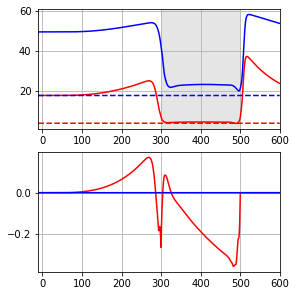

In [14]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-8
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047747552336886
RUN  0 , total integrated cost =  3.3047747552336886
Gradient descend method:  None
RUN  1 , total integrated cost =  3.3047747175037836
RUN  2 , total integrated cost =  3.304774694267117
RUN  3 , total integrated cost =  3.3047746863352327
RUN  4 , total integrated cost =  3.304774681770528
RUN  5 , total integrated cost =  3.304774679604951
RUN  6 , total integrated cost =  3.3047746783996725
RUN  7 , total integrated cost =  3.30477467777206


ERROR:root:Problem in initial value trasfer post


RUN  8 , total integrated cost =  3.3047746777720137
RUN  9 , total integrated cost =  3.3047746777720137
Control only changes marginally.
RUN  9 , total integrated cost =  3.3047746777720137
Improved over  9  iterations in  0.8901047490071505  seconds by  2.3439320528950702e-06  percent.
Problem in initial value trasfer post:  Vmean_exc -57.559189704924506 -57.53610814301935
cost splitting :  36.21876213347251 [3.12368087e+00 2.02367624e-09]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.3047746777720137
RUN  0 , total integrated cost =  3.3047746777720137
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  3.3047746777720137
Control only changes marginally.
RUN  1 , total integrated cost =  3.3047746777720137
Improved over  1  iterations in  0.14200723599060439  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -57.559189704924506 -57.53610814301935
cost splitting :  36.21876213347251 [3.12368087e+00 2.02367624e-09]


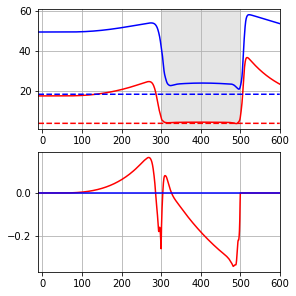

In [33]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-10
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)